In [28]:
#importing all the required libraries
import numpy
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPool2D, Activation, MaxPooling2D
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

In [23]:
#storing data and splitting them
(x_train,y_train), (x_test,y_test) = cifar10.load_data() 

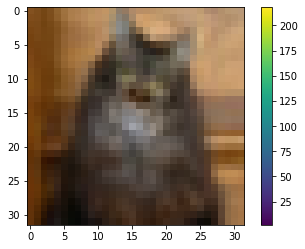

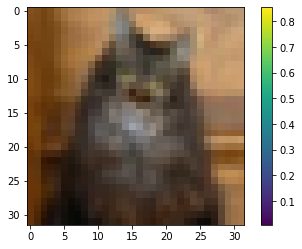

In [27]:
plt.figure()
plt.imshow(x_train[26])
plt.colorbar()

#rescaling it between 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0


#again plot
plt.figure()
plt.imshow(x_train[26])
plt.colorbar()

In [35]:
#create the model
model = Sequential()
#convolution layer: 64-> size of output, kernel_size->size of kernel, activation->activation function
model.add(Conv2D(64,activation = 'relu',kernel_size = (3,3 )))
#reducing size of matrix
model.add(MaxPooling2D(pool_size = (2,2)))
#standardizes input for each batch
model.add(BatchNormalization())
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(BatchNormalization())
#converts the output to 1d array
model.add(Flatten(input_shape = (32,32,3)))
#hidden layer that filters output
model.add(Dense(80, activation = 'relu'))
#output layer
model.add(Dense(10, activation = 'softmax'))

In [39]:
#compile the model
#optimizer optimizes model
#loss determines loss
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [38]:
#fit the model
#epochs is number of iterations
#validation_split is ratio of training and testing data
#verbose is what to be displayed in output
history = model.fit(x_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 69s 62ms/step - loss: 1.4514 - accuracy: 0.5118 - val_loss: 1.3125 - val_accuracy: 0.5679
Epoch 2/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.9759 - accuracy: 0.6580 - val_loss: 1.2574 - val_accuracy: 0.5860
Epoch 3/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.7671 - accuracy: 0.7300 - val_loss: 1.1640 - val_accuracy: 0.6049
Epoch 4/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.5970 - accuracy: 0.7897 - val_loss: 1.4011 - val_accuracy: 0.6053
Epoch 5/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.4475 - accuracy: 0.8434 - val_loss: 1.3601 - val_accuracy: 0.6140
Epoch 6/10
1094/1094 [==============================] - 67s 61ms/step - loss: 0.3304 - accuracy: 0.8845 - val_loss: 1.5484 - val_accuracy: 0.6399
Epoch 7/10
1094/1094 [==============================] - 68s 62ms/step - loss: 0.2402 - accuracy: 0.9171 - val_loss: 1.8909 -

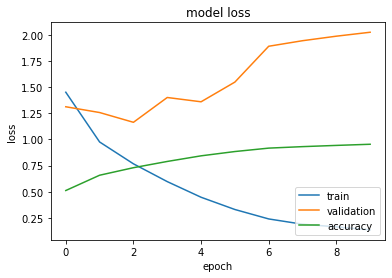

In [40]:
#loss plot
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.plot(history.history['accuracy'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation', 'accuracy'], loc = 'lower right')
    plt.show()
    
plotloss(history)